# ***Bussiness Problem***
The market research team at a Fitness equipments selling company wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

***Dataset***

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week

***Product Portfolio***

The KP281 is an entry-level treadmill that sells for $1,500.

The KP481 is for mid-level runners that sell for $1,750.

The KP781 treadmill is having advanced features that sell for $2,500.

In [ ]:
import pandas as pd

df = pd.read_csv("LinkOfDataset")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.isnull().sum() #Number of missing values for each column

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
#Find duplicates
df.duplicated().sum()

0

# **Univariate Analysis**

<Axes: xlabel='Gender', ylabel='count'>

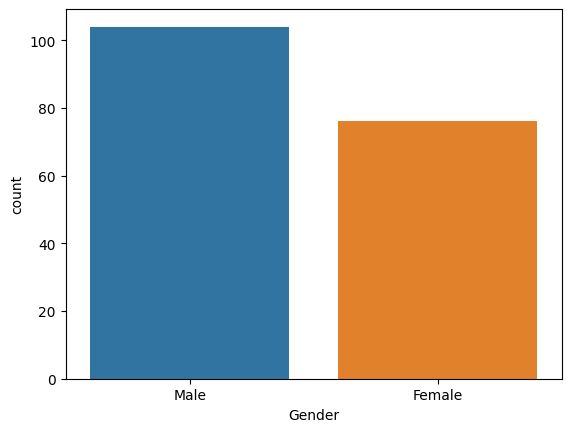

In [ ]:
#Now lets visualize the unique counts of categorical variable
import seaborn as sns
sns.countplot(data = df, x='Gender')

#As we can see from the below graph number of males are greater than females in the dataset

<Axes: xlabel='MaritalStatus', ylabel='count'>

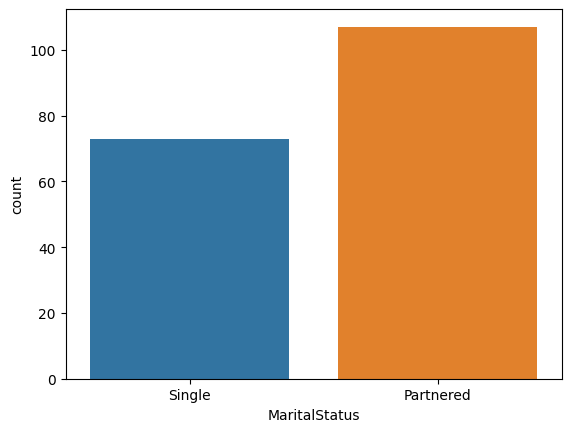

In [ ]:
sns.countplot(data = df, x='MaritalStatus')

#From the below graph we can say that our dataset has more partnered customers

<Axes: xlabel='Product', ylabel='count'>

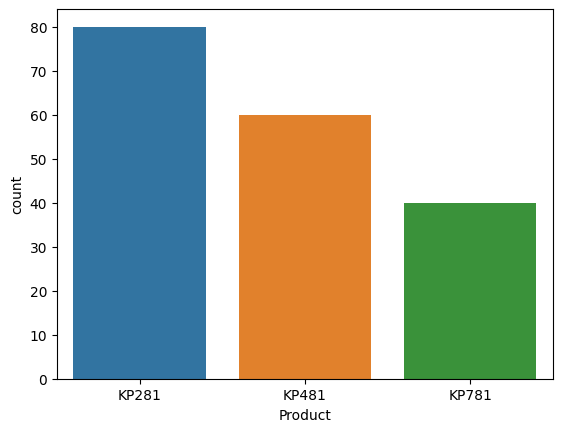

In [ ]:
sns.countplot(data = df, x='Product')

#As we can see from below graph, the most bought product is KP281

In [ ]:
df["Usage"].value_counts()

#Insight:- very few people have more usage. Most people have usage 3 or 4.

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [ ]:
df["MaritalStatus"].value_counts()

#More partnered customers in our dataset

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
df["Fitness"].value_counts()

#Insight:- Few people here are fit. Most people rate themselves as average (i.e: 3) in fitness level

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

# **Pearson Correlation**

In [ ]:
#Lets checkout correlation by converting the categorical columns to numeric ones
df_copy = df.copy()
df_copy["Gender"].replace(["Male","Female"],[1,0],inplace = True)
df_copy["MaritalStatus"].replace(["Single","Partnered"],[0,1],inplace=True)
df_copy["Product"].replace(["KP281","KP481","KP781"],[0,1,2],inplace=True)



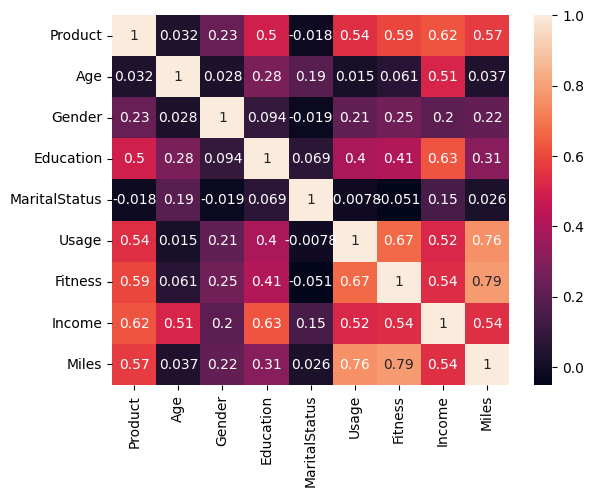

In [ ]:
#Lets create a heatmap
import matplotlib.pyplot as plt
sns.heatmap(df_copy.corr(),annot=True)
plt.show()


#As we can see from the below heatmap result:
#education and income are correlated.
#Age and income are also correlated
#Product is correlated with education,usage,fitness,income,miles.
#Usage is correlated with fitness, Miles and income as well
#Fitness and income are also correlated.


# **Univariate Analysis of Numerical features**

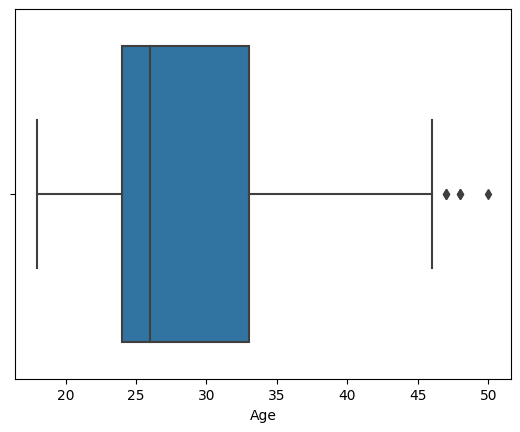

In [ ]:
#Now lets see outliers
sns.boxplot(x=df["Age"])
plt.show()

#Below graph shows there are some outliers here

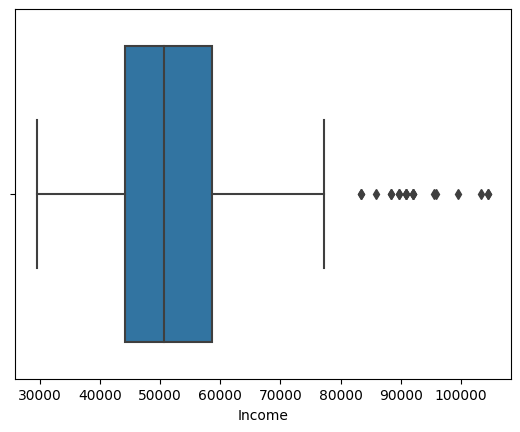

In [ ]:
sns.boxplot(x=df["Income"])
plt.show()

#Below graph shows there are some outliers here

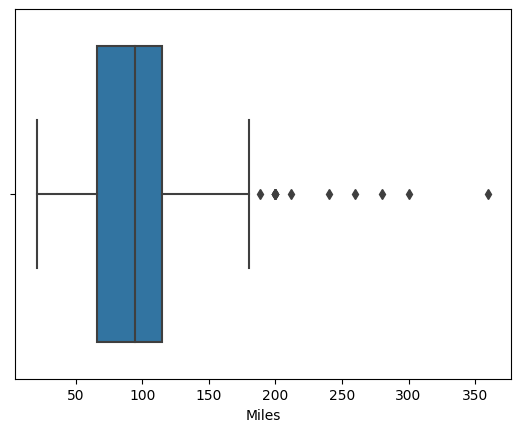

In [ ]:
sns.boxplot(x=df["Miles"])
plt.show()

#Below graph shows there are some outliers here

# **Dealing with Outliers & Missing Values**

In [ ]:
#Now lets remove outliers
import numpy as np


#Lets first create a variable which has only numerical variables of df
df_num_var = df[["Age","Education","Usage","Fitness","Income","Miles"]]

def remove_outliers(df):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Set a threshold for outlier detection (e.g., Q3 + 1.5 * IQR)
    threshold = 1.5

    # Replace outliers with NaN
    df[(df < Q1 - threshold * IQR) | (df > Q3 + threshold * IQR)] = np.nan


    return df


# Remove outliers from each column of the DataFrame
df_without_outliers = df_num_var.apply(remove_outliers)

print(df_without_outliers)


      Age  Education  Usage  Fitness   Income  Miles
0    18.0       14.0    3.0      4.0  29562.0  112.0
1    19.0       15.0    2.0      3.0  31836.0   75.0
2    19.0       14.0    4.0      3.0  30699.0   66.0
3    19.0       12.0    3.0      3.0  32973.0   85.0
4    20.0       13.0    4.0      2.0  35247.0   47.0
..    ...        ...    ...      ...      ...    ...
175  40.0        NaN    NaN      5.0      NaN    NaN
176  42.0       18.0    5.0      4.0      NaN    NaN
177  45.0       16.0    5.0      5.0      NaN  160.0
178   NaN       18.0    4.0      5.0      NaN  120.0
179   NaN       18.0    4.0      5.0      NaN  180.0

[180 rows x 6 columns]


In [ ]:
#Now lets add back out categorical columns to this above dataframe
df_without_outliers[["Product","Gender","MaritalStatus"]] = df[["Product","Gender","MaritalStatus"]]
print(df_without_outliers)

      Age  Education  Usage  Fitness   Income  Miles Product  Gender  \
0    18.0       14.0    3.0      4.0  29562.0  112.0   KP281    Male   
1    19.0       15.0    2.0      3.0  31836.0   75.0   KP281    Male   
2    19.0       14.0    4.0      3.0  30699.0   66.0   KP281  Female   
3    19.0       12.0    3.0      3.0  32973.0   85.0   KP281    Male   
4    20.0       13.0    4.0      2.0  35247.0   47.0   KP281    Male   
..    ...        ...    ...      ...      ...    ...     ...     ...   
175  40.0        NaN    NaN      5.0      NaN    NaN   KP781    Male   
176  42.0       18.0    5.0      4.0      NaN    NaN   KP781    Male   
177  45.0       16.0    5.0      5.0      NaN  160.0   KP781    Male   
178   NaN       18.0    4.0      5.0      NaN  120.0   KP781    Male   
179   NaN       18.0    4.0      5.0      NaN  180.0   KP781    Male   

    MaritalStatus  
0          Single  
1          Single  
2       Partnered  
3          Single  
4       Partnered  
..            .

In [ ]:
#Now lets drop rows containing nan values
df_without_outliers.dropna(axis=0, how='any', subset=None, inplace=True)



# **Bivariate & Multivariate Analysis**

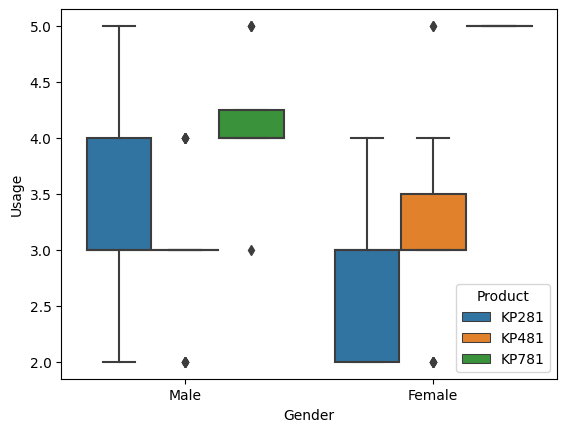

In [ ]:
#We are done with missing values and outliers

#Now lets start the analysis

#Which product works for which gender?

import matplotlib.pyplot as plt
# Plotting the box plot
sns.boxplot(x='Gender', y='Usage', hue='Product', data=df_without_outliers)
plt.xlabel('Gender')
plt.ylabel('Usage')
plt.show()

#Insight:- From the below graph, we can say that males who bought KP781 has higher median usage than males who bought KP281 or KP481.

In [ ]:
#From the above graph it looks like Females with usage 5.0 only buys KP781
#lets check:-
df_for_test = df_without_outliers[(df_without_outliers["Usage"]==5) & (df_without_outliers["Gender"]=="Female")]
df_for_test["Product"].value_counts()

#Insight:- Female with usage 5.0 does not buy KP281

KP481    2
KP781    1
Name: Product, dtype: int64

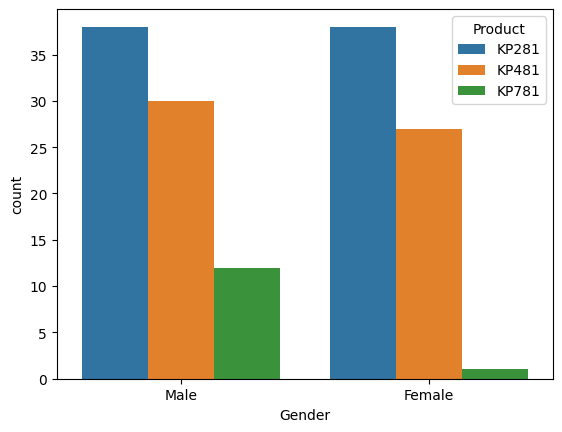

In [ ]:
sns.countplot(x='Gender', hue='Product', data=df_without_outliers)
plt.show()

#Insight from the below graph:- very less females buy KP781 compared to males.

<Axes: xlabel='Fitness', ylabel='count'>

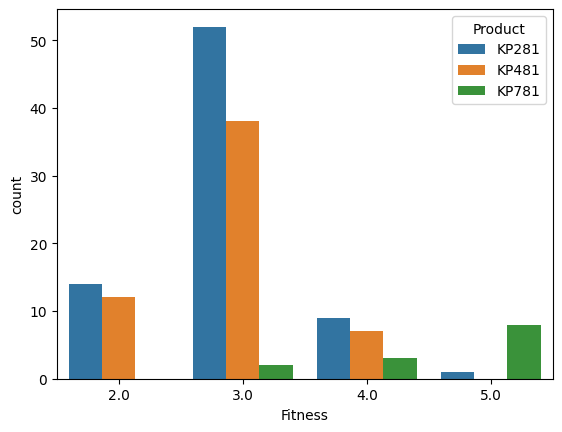

In [ ]:
#lets find out which fitness level uses which product
sns.countplot(x='Fitness',hue='Product',data=df_without_outliers)

#Insights from the below graph:-
#Fitness level 2 does not buy KP781
#Fitness level 5 person does not buy KP481. Fitness level 5 person is more likely to buy KP781.

Recommendation:- Since people of fitness 2.0 is not buying KP781 at all, sales team should explain such customer that buying a treadmill is a one time investment for a long term and if they want to be fit in the future, our advance features of KP781 would help to increase their fitness level more quickly. Also such a customer should be informed that once you reach higher fitness levels you would need KP781 anyways and then you would have to again buy that in the future if you buy other product now. Such customer should be informed that all the people with high fitness levels buy and use KP781.

<Axes: xlabel='Usage', ylabel='count'>

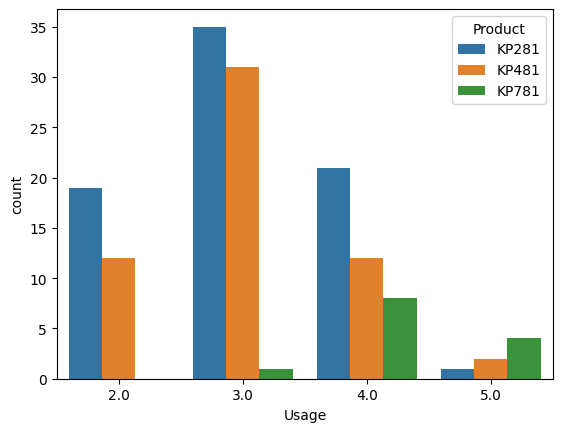

In [ ]:
sns.countplot(x='Usage',hue='Product',data=df_without_outliers)

#Insight:- Below graph shows that person with usage 2 will not buy KP781. Person with fitness 5 is more likely to buy KP781 then other two product.

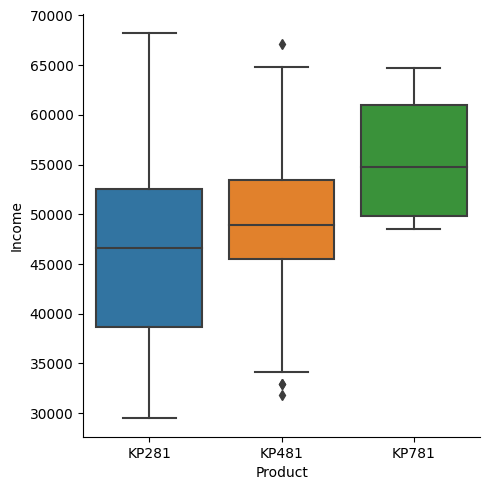

In [ ]:
#How does income play a role in buying products?
sns.catplot(x="Product", y="Income", data=df_without_outliers, kind="box")

#Insights from the below graph:-
#People who buy KP781 has income more then 45000.
#People belonging in all the types of income groups buy KP281.

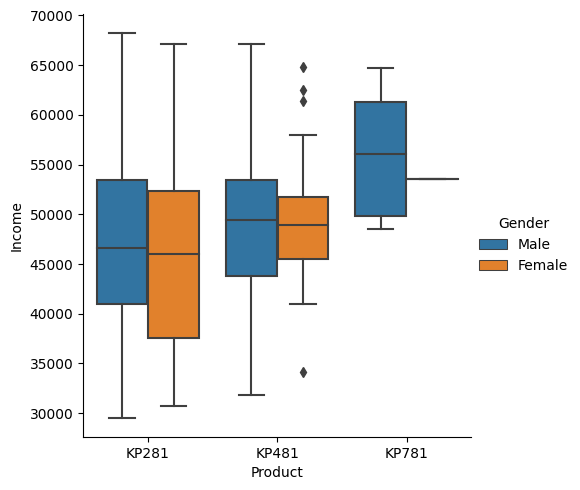

In [ ]:
#How does income & Gender play a role in buying products?
sns.catplot(x="Product", y="Income",hue="Gender", data=df_without_outliers, kind="box")

In [ ]:
#Lets create income bins which would make us easy to analyze
df_without_outliers.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,28.006849,15.150685,3.164384,3.075342,48053.650685,88.034247
std,6.259334,1.266777,0.813908,0.743576,8852.564836,30.364093
min,18.000000,12.000000,2.000000,2.000000,29562.000000,38.000000
25%,23.000000,14.000000,3.000000,3.000000,42069.000000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,48891.000000,85.000000
75%,33.000000,16.000000,4.000000,3.000000,53439.000000,105.250000
max,46.000000,18.000000,5.000000,5.000000,68220.000000,180.000000


In [ ]:
#Our bins will be: 0to42000:- low, 42000to49000:- moderate, 49000to54000:- High, 54000to69000:- very high
bin_edges = [0, 42000, 49000, 54000, 69000]
bin_labels = ['Low', 'Moderate', 'High', 'Very High']

df_without_outliers['Income bin'] = pd.cut(df_without_outliers['Income'], bins=bin_edges, labels=bin_labels)

df_without_outliers

,Age,Education,Usage,Fitness,Income,Miles,Product,Gender,MaritalStatus,Income bin
0,18.0,14.0,3.0,4.0,29562.0,112.0,KP281,Male,Single,Low
1,19.0,15.0,2.0,3.0,31836.0,75.0,KP281,Male,Single,Low
2,19.0,14.0,4.0,3.0,30699.0,66.0,KP281,Female,Partnered,Low
3,19.0,12.0,3.0,3.0,32973.0,85.0,KP281,Male,Single,Low
4,20.0,13.0,4.0,2.0,35247.0,47.0,KP281,Male,Partnered,Low
...,...,...,...,...,...,...,...,...,...,...
150,25.0,16.0,4.0,5.0,49801.0,120.0,KP781,Male,Partnered,High
151,25.0,16.0,4.0,4.0,62251.0,160.0,KP781,Male,Partnered,Very High
153,25.0,18.0,4.0,3.0,64741.0,100.0,KP781,Male,Partnered,Very High
158,26.0,16.0,5.0,4.0,64741.0,180.0,KP781,Male,Partnered,Very High


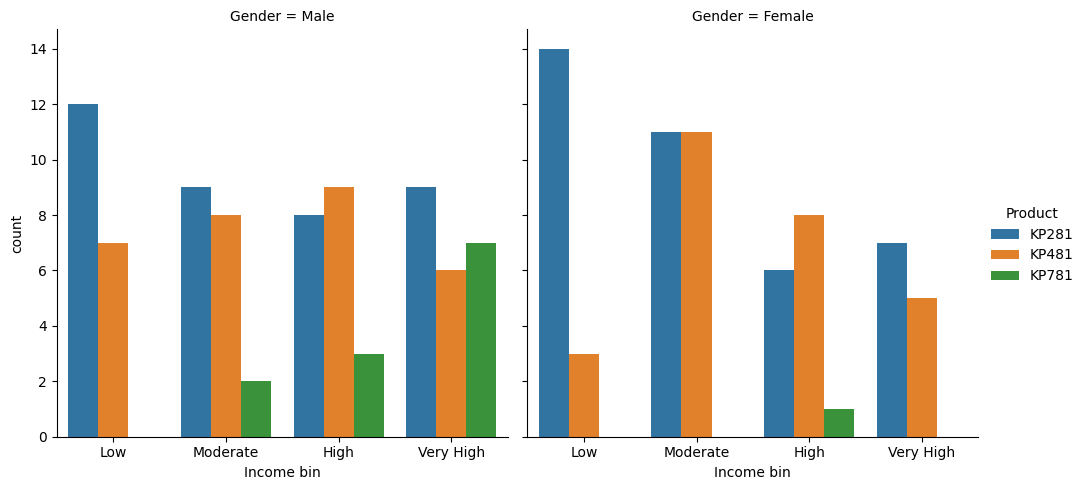

In [ ]:
sns.catplot(x='Income bin', col='Gender', hue='Product', kind='count', data=df_without_outliers)
plt.show()

#Insight:- Females in High income category only buys kP781.

Recommendation:- Only if female is in high income category, show her KP781 along with other two products. Otherwise, for female in moderate income category, try to highlight the benefits of KP481 over KP281 because the above graph shows that she is equally likely to buy KP281 or KP481. And only if she buys KP481 then the revenue of company would increase.

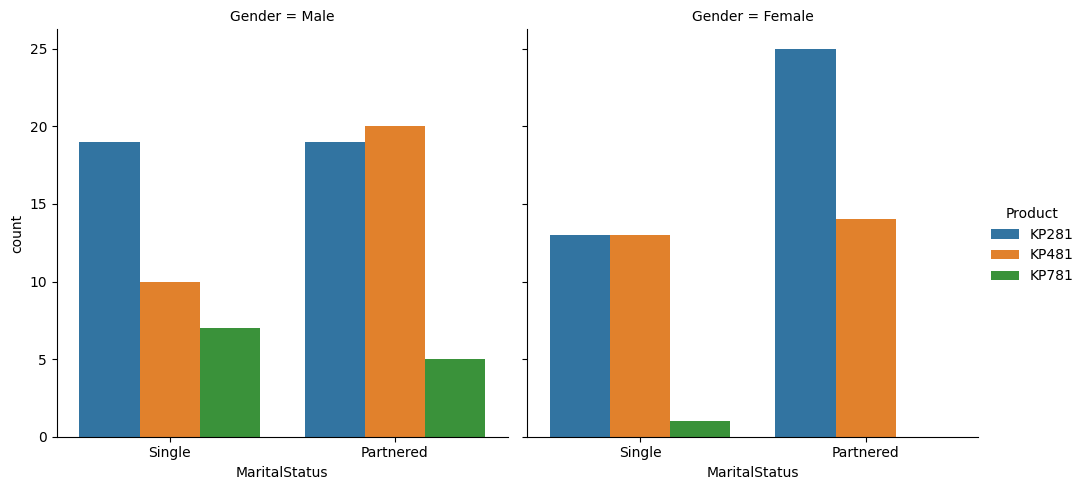

In [ ]:
sns.catplot(x='MaritalStatus', col='Gender', hue='Product', kind='count', data=df_without_outliers)
plt.show()

#Insight from below graph:-
#Partnered females are not buying KP781.
#Partnered females are more likely to buy KP281
#Partnered males are more likely to buy KP481
#Single males are more likely to buy KP281

Recommendation:- Sales person need to also explain the important features of KP781 to partnered female customers and also focus on explaining how it can be usefull to not only her but also her husband.

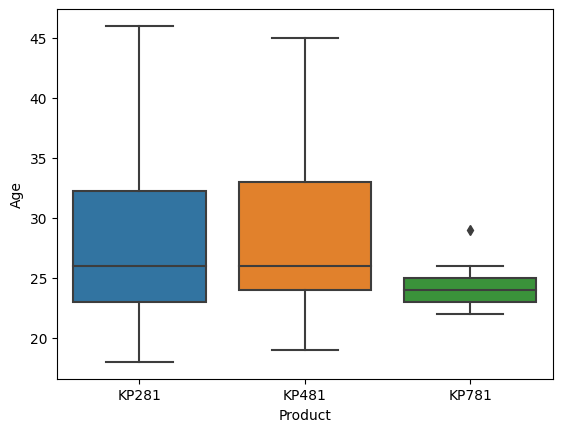

In [ ]:
sns.boxplot(x='Product', y='Age', data=df_without_outliers)
plt.show()

#Insight:- Only young people (i.e between 20 to 30) buy KP781.

Recomendation:- There might be a possibility that only young people are aware of the importance of new features that KP781 has through social media. There should be targeted marketing for people above 30 in places where these people spend their time the most (like:- TV, whatsapp, news channels etc.) to better market KP781 products by explaining importance of the features it has.

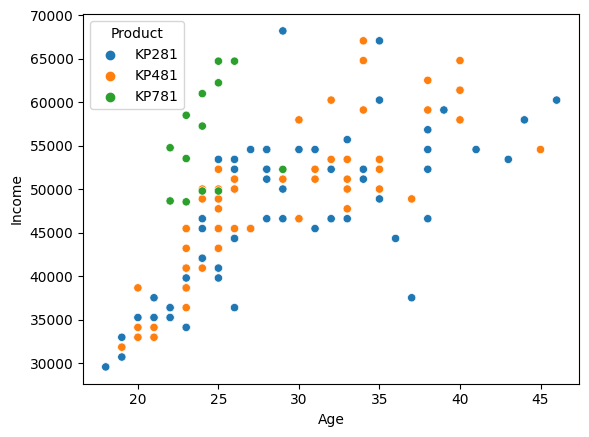

In [ ]:
sns.scatterplot(x='Age', y='Income', hue='Product', data=df_without_outliers)
plt.show()

#Insight :- people with imcomes greater than 45000 and young age (less than 30) are buying KP781.

In [ ]:
#Now lets create bins for age column
df_without_outliers["Age"].describe()

count    146.000000
mean      28.006849
std        6.259334
min       18.000000
25%       23.000000
50%       26.000000
75%       33.000000
max       46.000000
Name: Age, dtype: float64

In [ ]:
bin_edges = [0, 20, 25, 30, 35, 40, 50]
bin_labels = ['<20', '20-25', '25-30', '30-35','35-40','40+']

df_without_outliers["Age bins"] = pd.cut(df_without_outliers["Age"], bins=bin_edges, labels=bin_labels)


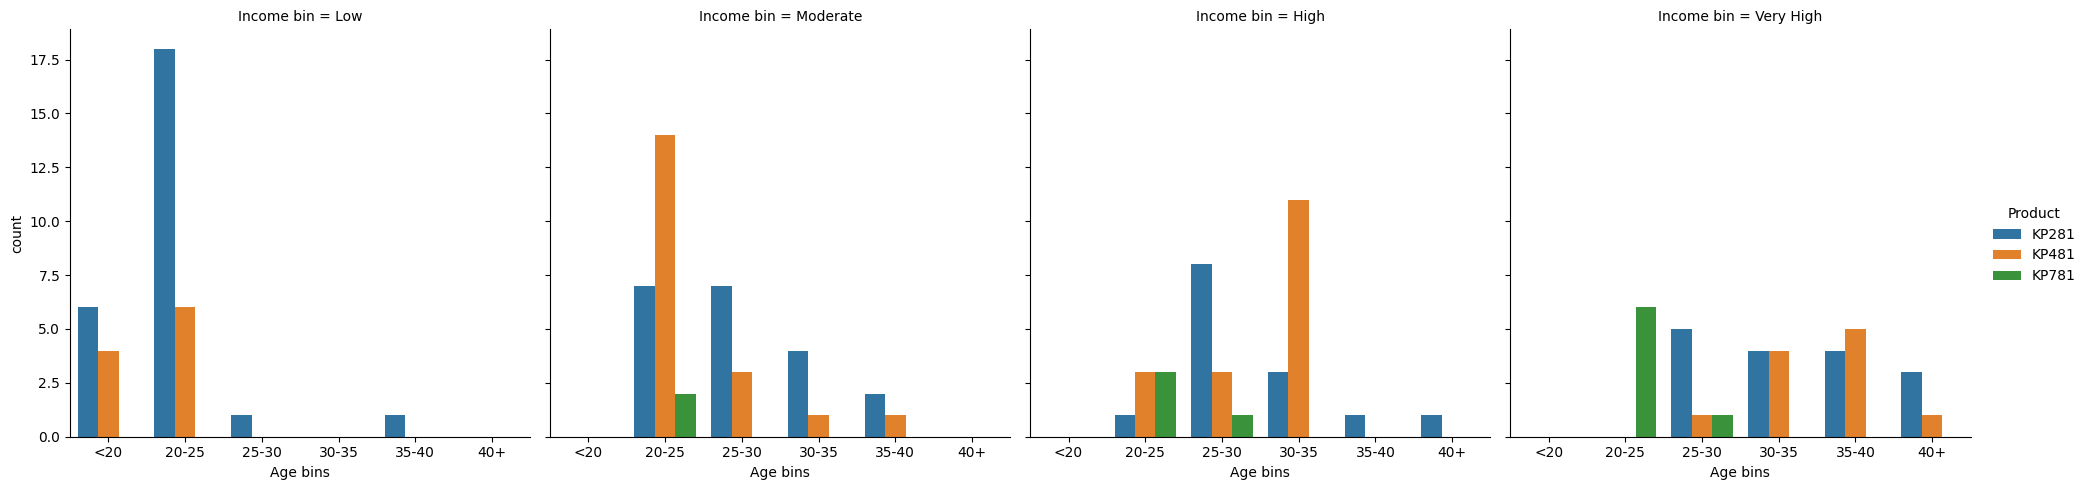

In [ ]:
sns.catplot(x='Age bins', col='Income bin', hue='Product', kind='count', data=df_without_outliers)
plt.show()

#Insights from below graph:-
#1)Customers with Low income between age 25 to 40 will buy KP281 only.
#2)Customers with Low income and age<26 is more likely to buy KP281.
#3)Customers with Moderate income and age 20-25 is more likely to buy KP481.
#4)Customers with moderate income and age>25 is more likely to buy KP281.
#5)Customers with High income with age > 34 will only buy KP281.
#6)Customers with High income and age 30-35 is more likely to buy KP481.
#7)Customers with High income and age 25-30 is more likely to buy kP281.
#8)Customers with Very high income and age 20-25 will buy KP781 only.
#9)Customer above 30age will not buy KP781.

Recommendations:-

1)Do not put effort to sell KP781 to Low income group customer. Directly show them KP281 only if they are above 25 years of age.

2)Show KP781 to only customer whose age 20-25 and income bin moderate. Else dont show KP781 to Moderate income customer.

3)If the customer is in HIGH income group and is below 30 years then try to highlight the benefits of features of KP781 more over other products because customer is equally likely to buy them.

4) If the customer is above 35 years and has High income then dont show them KP481 and KP781.

5)Directly show KP781 to customers with very high income and age 20-25. And showcase the benefits of KP481 over KP281 to the customers whose age is above 30 and has very high income.

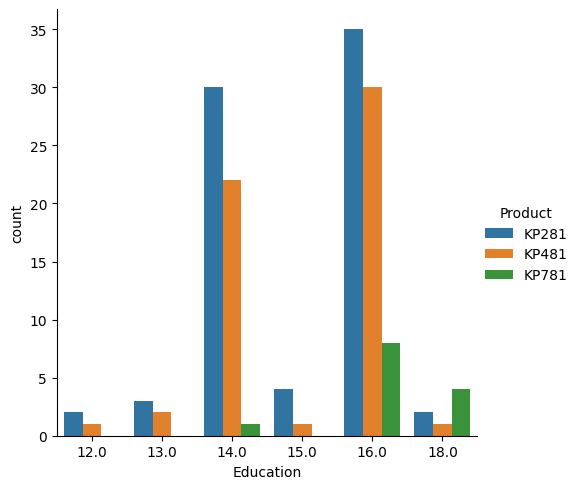

In [ ]:
#Now lets see how education is affecting the product
sns.catplot(x='Education', hue='Product', kind='count', data=df_without_outliers)
plt.show()

#Insight from below graph:- Customers with education=18 is most likely to buy KP781. Less educated customers(i.e 12 and 13) will not buy KP781 but they are more likely to buy.

Recommendation:- Customers with less education level might not be buying KP781 because they might not be able to understand it's complex features or might be hesitant due to less confidence on themselves that they would be able to use such complex features on their own after buying. TO solve this, a visual poster or template must be created that can explain the workings of the complex features in an easy manner. Also sales team should conduct a session where they teach the customers how to use the complex features.

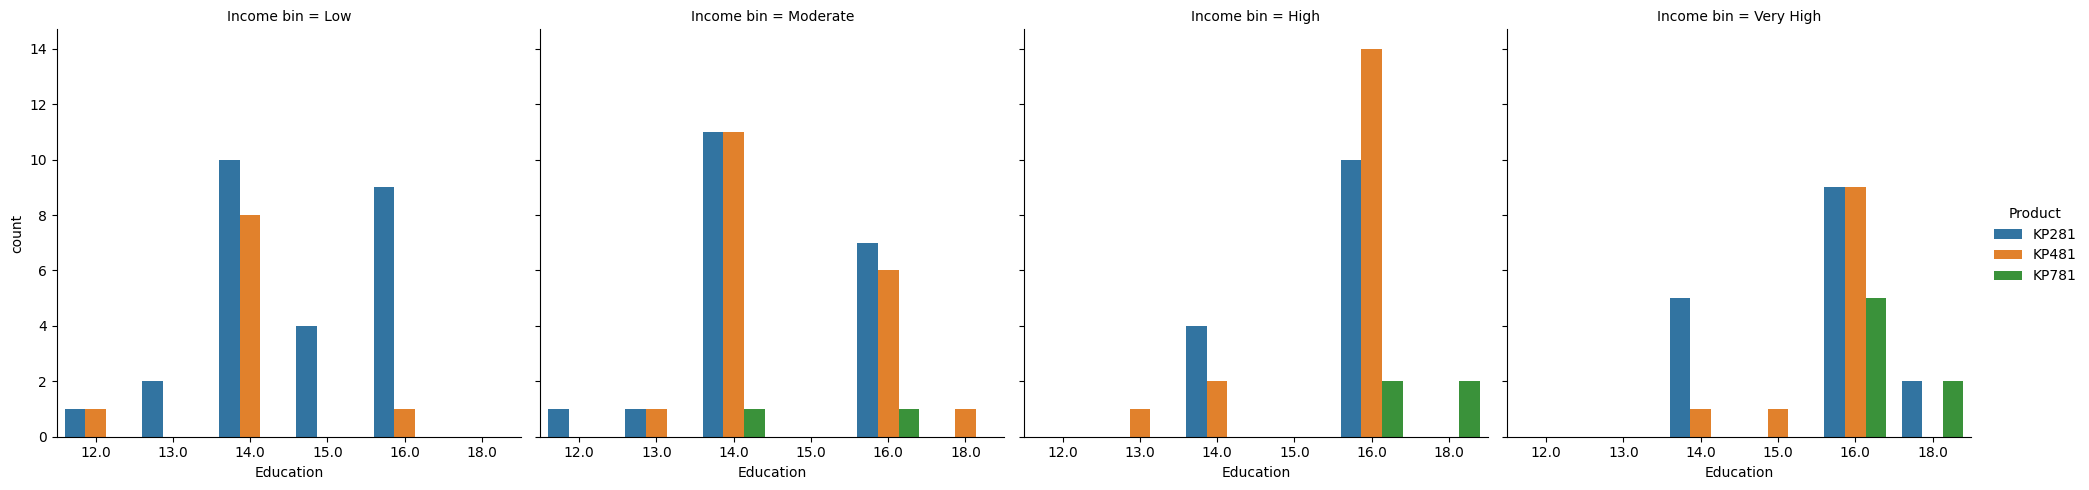

In [ ]:
sns.catplot(x='Education',col='Income bin', hue='Product', kind='count', data=df_without_outliers)
plt.show()

#Insights from below graph:-
#Low income customer with education = 13 or 15 will buy KP281 only.
#Moderate income and education = 12 will buy KP281 only.
#Moderate income and education = 18 will buy KP481 only.
#High income and education=18 will buy KP781 only.


Recommendation:-

1)Show KP481 to Moderate income with education=18.

2)Try to highlight more the benefits of KP481 over KP281 for customers in Moderate income category with education level between 13 to 16. Because these customers are equally likely to buy KP281 and KP481.

3)Show KP781 first over other products to customers with high and very high income with education=16and18.

4)Showcase the benefits of KP781 over other products to customers with very high income and education=18.

# **Conditional Probablities**

In [ ]:
#NOW lets find out conditional probabilities for gender and product
pd.crosstab(index=df_without_outliers["Gender"],columns=df_without_outliers["Product"],margins=True)


Product,KP281,KP481,KP781,All
Gender,,,,
Female,38,27,1,66
Male,38,30,12,80
All,76,57,13,146


In [ ]:
#lets normalize also
pd.crosstab(index=df_without_outliers["Gender"],columns=df_without_outliers["Product"],margins=True,normalize=True) * 100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,26.027397,18.493151,0.684932,45.205479
Male,26.027397,20.547945,8.219178,54.794521
All,52.054795,39.041096,8.904110,100.000000


In [ ]:
#lets find Prob(Buying Product | Gender)
pd.crosstab(index=df_without_outliers["Gender"],columns=df_without_outliers["Product"],margins=True,normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.575758,0.409091,0.015152
Male,0.475000,0.375000,0.150000
All,0.520548,0.390411,0.089041


In [ ]:
#lets find Prob(Gender | Bought that product)
pd.crosstab(index=df_without_outliers["Gender"],columns=df_without_outliers["Product"],margins=True,normalize='columns')

#Insight:- if KP781 is bought, probability is more that the customer will be male.

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.5,0.473684,0.076923,0.452055
Male,0.5,0.526316,0.923077,0.547945


In [ ]:
#Optimised code using for loop to find Prob(Buying product | column) for each columns
from IPython.display import display
cat_cols = ["Gender","Education","MaritalStatus","Usage","Fitness","Age bins","Income bin"]
for i in cat_cols:
  print('Table for Probability of Buying product given',str(i))
  display(pd.crosstab(index=df_without_outliers[i], columns=df_without_outliers["Product"], margins=True, normalize='index'))
  print("\n")

Table for Probability of Buying product given Gender


Product,KP281,KP481,KP781
Gender,,,
Female,0.575758,0.409091,0.015152
Male,0.475000,0.375000,0.150000
All,0.520548,0.390411,0.089041




Table for Probability of Buying product given Education


Product,KP281,KP481,KP781
Education,,,
12.0,0.666667,0.333333,0.000000
13.0,0.600000,0.400000,0.000000
14.0,0.566038,0.415094,0.018868
15.0,0.800000,0.200000,0.000000
16.0,0.479452,0.410959,0.109589
18.0,0.285714,0.142857,0.571429
All,0.520548,0.390411,0.089041




Table for Probability of Buying product given MaritalStatus


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.530120,0.409639,0.060241
Single,0.507937,0.365079,0.126984
All,0.520548,0.390411,0.089041




Table for Probability of Buying product given Usage


Product,KP281,KP481,KP781
Usage,,,
2.0,0.612903,0.387097,0.000000
3.0,0.522388,0.462687,0.014925
4.0,0.512195,0.292683,0.195122
5.0,0.142857,0.285714,0.571429
All,0.520548,0.390411,0.089041




Table for Probability of Buying product given Fitness


Product,KP281,KP481,KP781
Fitness,,,
2.0,0.538462,0.461538,0.000000
3.0,0.565217,0.413043,0.021739
4.0,0.473684,0.368421,0.157895
5.0,0.111111,0.000000,0.888889
All,0.520548,0.390411,0.089041




Table for Probability of Buying product given Age bins


Product,KP281,KP481,KP781
Age bins,,,
<20,0.600000,0.400000,0.000000
20-25,0.433333,0.383333,0.183333
25-30,0.700000,0.233333,0.066667
30-35,0.407407,0.592593,0.000000
35-40,0.571429,0.428571,0.000000
40+,0.800000,0.200000,0.000000
All,0.520548,0.390411,0.089041




Table for Probability of Buying product given Income bin


Product,KP281,KP481,KP781
Income bin,,,
Low,0.722222,0.277778,0.000000
Moderate,0.487805,0.463415,0.048780
High,0.400000,0.485714,0.114286
Very High,0.470588,0.323529,0.205882
All,0.520548,0.390411,0.089041


Recommendations based on above conditional probabilities:-
1. Dont show KP781 to customers whose education less than 16.0. It's conditional probability is almost zero.
2. Dont show KP781 to customers whose usage and fitness is less than 4.0.
3. Dont show KP481 to customers whose fitness is 5.0 (Its conditional probability is zero)
4.Dont show KP781 to customers whose age is below 20 or above 30 years of age.
5.Dont show KP781 to Low income (i.e less than 42000) and moderate income (P=0.04)


